In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier,KerasRegressor
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.datasets import make_regression
from sklearn import metrics
import math
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [2]:
df=pd.read_csv('data/data_procesada.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Kilometers_Driven          6019 non-null   int64  
 1   Mileage                    6019 non-null   float64
 2   Engine                     6019 non-null   int64  
 3   Power                      6019 non-null   float64
 4   Seats                      6019 non-null   float64
 5   Price                      6019 non-null   float64
 6   Year_Since                 6019 non-null   float64
 7   Model                      6019 non-null   int64  
 8   Brand                      6019 non-null   int64  
 9   Location;Bangalore         6019 non-null   int64  
 10  Location;Chennai           6019 non-null   int64  
 11  Location;Coimbatore        6019 non-null   int64  
 12  Location;Delhi             6019 non-null   int64  
 13  Location;Hyderabad         6019 non-null   int64

In [4]:
y=df['Price'].values
x=df.drop(['Price'],axis=1).values

In [5]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [7]:
def encontrar_mejor_modelo(X_train, y_train, modelos, hiperparametros, cv=5, scoring='r2'):
    mejores_modelos = {}
    
    for nombre_modelo, modelo in modelos.items():
        params = hiperparametros[nombre_modelo]
        
        grid_search = GridSearchCV(estimator=modelo, param_grid=params, cv=cv, scoring=scoring)
        grid_search.fit(X_train, y_train)
        
        mejor_modelo = grid_search.best_estimator_
        mejor_puntaje = grid_search.best_score_
        
        mejores_modelos[nombre_modelo] = {'modelo': mejor_modelo, 'puntaje': mejor_puntaje}
        
    return mejores_modelos


modelos = {
    'Regresión Lineal': LinearRegression(),
    'Árbol de Decisión': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

hiperparametros = {
    'Regresión Lineal': {},
    'Árbol de Decisión': {'max_depth': [None, 5, 10]},
    'Random Forest': {'n_estimators': [10, 50, 100], 'max_depth': [None, 5, 10]}
}


mejores_modelos = encontrar_mejor_modelo(X_train, y_train, modelos, hiperparametros)

for nombre_modelo, info_modelo in mejores_modelos.items():
    print(nombre_modelo)
    print('Mejor puntaje (R2):', info_modelo['puntaje'])
    print('Mejores hiperparámetros:', info_modelo['modelo'].get_params())
    print('---')

Regresión Lineal
Mejor puntaje (R2): 0.4398153335798883
Mejores hiperparámetros: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}
---
Árbol de Decisión
Mejor puntaje (R2): 0.8004996873305847
Mejores hiperparámetros: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
---
Random Forest
Mejor puntaje (R2): 0.8974430443691533
Mejores hiperparámetros: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
---


In [8]:
regresion=Sequential()
regresion.add(Dense(units=6,activation='relu'))
regresion.add(Dense(units=6,activation='relu'))
regresion.add(Dense(units=6,activation='relu'))
regresion.add(Dense(units=1))
regresion.compile(optimizer='adam',loss='mean_squared_error')

In [9]:
regresion.compile(optimizer='adam',loss='mean_squared_error')
regresion.fit(X_train,y_train,epochs=100,batch_size=32,validation_data=(X_test,y_test),callbacks=EarlyStopping(monitor='val_loss',patience=4))

Epoch 1/100
151/151 [==============================] - 1s 1ms/step - loss: 211.4938 - val_loss: 180.5667
Epoch 2/100
151/151 [==============================] - 0s 794us/step - loss: 131.5816 - val_loss: 66.6083
Epoch 3/100
151/151 [==============================] - 0s 784us/step - loss: 48.4501 - val_loss: 40.1104
Epoch 4/100
151/151 [==============================] - 0s 784us/step - loss: 36.3006 - val_loss: 35.7754
Epoch 5/100
151/151 [==============================] - 0s 784us/step - loss: 31.6440 - val_loss: 33.2830
Epoch 6/100
151/151 [==============================] - 0s 794us/step - loss: 28.9366 - val_loss: 31.3852
Epoch 7/100
151/151 [==============================] - 0s 827us/step - loss: 27.1312 - val_loss: 30.1129
Epoch 8/100
151/151 [==============================] - 0s 797us/step - loss: 25.9316 - val_loss: 28.7474
Epoch 9/100
151/151 [==============================] - 0s 784us/step - loss: 24.9953 - val_loss: 27.7917
Epoch 10/100
151/151 [==============================] 

<Axes: >

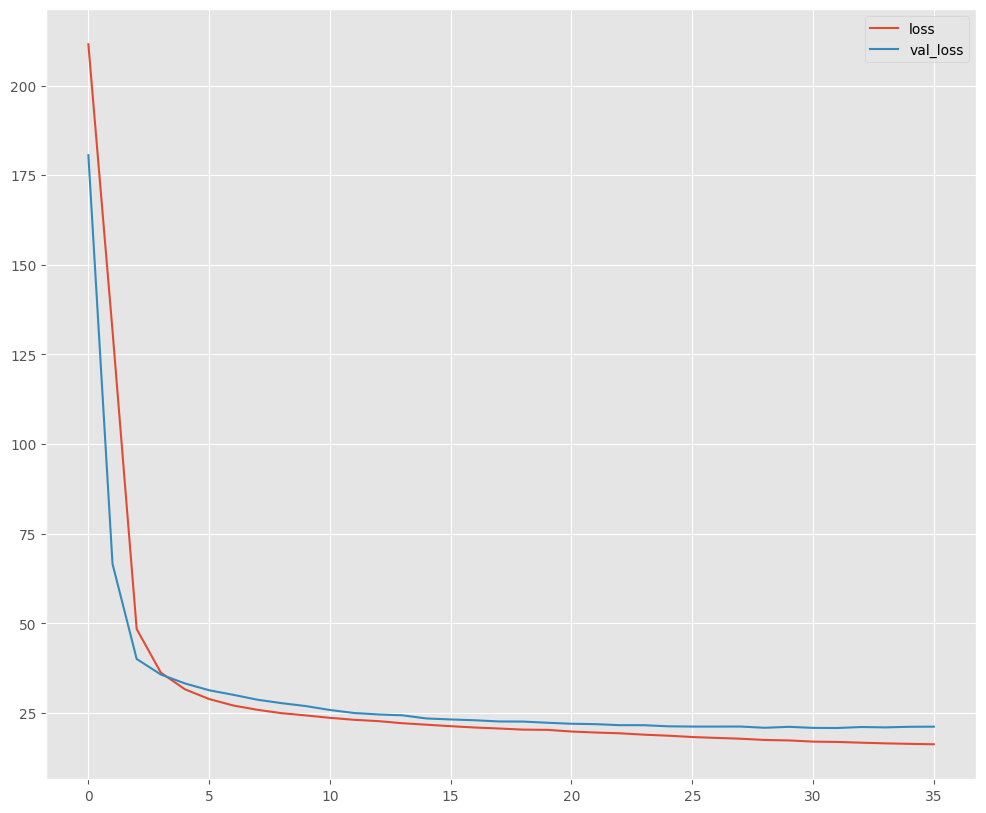

In [10]:
losses=pd.DataFrame(regresion.history.history)
plt.style.use("ggplot")
losses.plot(figsize=(12,10))

In [11]:
predict=regresion.predict(X_test)
predict_df=pd.DataFrame(np.ravel(predict),columns=['Predicciones'])
comparasion_df=pd.concat([pd.DataFrame(y_test,columns=['Precio_Real']),predict_df],axis=1)
comparasion_df.round(2)
comparasion_df.round(2).head(5)

38/38 [==============================] - 0s 487us/step


,Precio_Real,Predicciones
0,5.75,4.53
1,10.08,9.16
2,7.85,8.00
3,2.40,5.65
4,1.60,2.97


In [12]:
print("MAE:",metrics.mean_absolute_error(y_test,predict))
print ("MSE:",metrics.mean_squared_error(y_test,predict))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predict)))
print(metrics.explained_variance_score(y_test,predict))

MAE: 2.27803581471459
MSE: 21.237726847021005
RMSE: 4.608440826030102
0.8274277647903374
